# Statlog German Credit Data

## Add a table of contents
###Introduce the dataset and the purpose of the analysis

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Ingestion and Exploration

## 1.1 Data Ingestion

#### We will keep it simple for now, and load the data as a csv. We will build an ingestion pipeline for live data later on.

In [97]:
file_path = 'data/statlog+german+credit+data/german.data'
sep = ' '
header = None
df = pd.read_csv(file_path, sep=sep, header=header)

In [98]:
column_names = [
    'checking_account_status',
    'duration_in_month',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account_status',
    'present_employment_range',
    'installment_rate_in_percentage_of_disposable_income',
    'personal_status_and_sex',
    'coapplicants_and_guarantor',
    'present_residence_since',
    'property_type',
    'age_in_years',
    'other_installment_plans',
    'housing_status',
    'number_of_existing_credits_at_this_bank',
    'job_type',
    'number_of_dependents',
    'telephone_status',
    'foreign_worker_status',
    'credit_risk'
]

df.columns = column_names

In [99]:
df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   checking_account_status                              1000 non-null   object
 1   duration_in_month                                    1000 non-null   int64 
 2   credit_history                                       1000 non-null   object
 3   purpose                                              1000 non-null   object
 4   credit_amount                                        1000 non-null   int64 
 5   savings_account_status                               1000 non-null   object
 6   present_employment_range                             1000 non-null   object
 7   installment_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 8   personal_status_and_sex                              1000 non-null   object
 9 

In [101]:
df.isnull().sum()

checking_account_status                                0
duration_in_month                                      0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_status                                 0
present_employment_range                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
coapplicants_and_guarantor                             0
present_residence_since                                0
property_type                                          0
age_in_years                                           0
other_installment_plans                                0
housing_status                                         0
number_of_existing_credits_at_this_bank                0
job_type                                               0
number_of_dependents           

In [102]:
continuity_status = False

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.floating):
        continuity_status = True
        print(f'Continuity found in {col}: {df[col].dtype}')
if not continuity_status:
    print('No Continuities Found.')

No Continuities Found.


In [116]:
variable_types = {
    'checking_account_status': 'ordinal',
    'duration_in_month': 'numeric_continuous',
    'credit_history': 'ordinal',
    'purpose': 'nominal',
    'credit_amount': 'numeric_continuous',
    'savings_account_status': 'ordinal',
    'present_employment_range': 'ordinal',
    'installment_rate_in_percentage_of_disposable_income':
        'numeric_discrete', #Rates are usually continuous. However, our data
    # are whole numbers, and therefore will be treated as discrete
    'personal_status_and_sex': 'nominal',
    'coapplicants_and_guarantor': 'nominal',
    'present_residence_since': 'numeric_discrete',
    'property_type': 'nominal',
    'age_in_years': 'numeric_continuous', # considering the fact that the
    # range of ages are vast, we will treat this as continuous
    'other_installment_plans': 'nominal',
    'housing_status': 'nominal',
    'number_of_existing_credits_at_this_bank': 'numeric_discrete',
    'job_type': 'ordinal', # considering the fact that the sequence goes from
    # unemployed/unskilled>management/officer
    'number_of_dependents': 'numeric_discrete',
    'telephone_status': 'binary',
    'foreign_worker_status': 'binary',
    'credit_risk': 'binary'
}

In [117]:
### Data Remapping

### Data Remapping

Since we are focusing our analysis to this bank/performing an internal
credit analysis, and not
focusing on credit from other institutions, we will not map data unrelated to
 this bank.

Additionally, at this moment, we are interested in exploring our dataset.
Hence, we will not encode categorical data into numeric values. That will be
done during the analysis portion of this paper, as well as in the production
application.

In [118]:
df_index_map = {
    'checking_account_status': {
        'A11': '< 0 DM',
        'A12': '0 - 200 DM',
        'A13': '>= 200 DM',
        'A14': 'No Checking Account'
    },
    'credit_history': {
        'A30': 'No credits taken',
        'A31': 'All credits paid back duly',
        'A32': 'existing credits paid back duly till now',
        'A33': 'Delay in paying off in the past',
        'A34': 'Critical account'
    },
    'purpose': {
        'A40': 'new car',
        'A41': 'used car',
        'A42': 'furniture/equipment',
        'A43': 'radio/television',
        'A44': 'domestic appliances',
        'A45': 'repairs',
        'A46': 'education',
        'A47': 'vacation',
        'A48': 'retraining',
        'A49': 'business',
        'A410': 'other'
    },
    'savings_account_status': {
        'A61': '< 100 DM',
        'A62': '100 <=...< 500 DM',
        'A63': '500 <=...< 1000 DM',
        'A64': '>= 1000 DM',
        'A65': 'unknown/no savings account'
    },
    'present_employment_range': {
        'A71': 'unemployed',
        'A72': '< 1 year',
        'A73': '1 <=...< 4 years',
        'A74': '4 <=...< 7 years',
        'A75': '>= 7 years',
    },
    'personal_status_and_sex': {
        'A91': 'male/divorced or separated',
        'A92': 'female/not single',
        'A93': 'male/single',
        'A94': 'male/married or widowed',
        'A95': 'female/single',
    },
    'coapplicants_and_guarantor': {
        'A101': 'none',
        'A102': 'co-applicant',
        'A103': 'guarantor',
    },
    'property_type': {
        'A121': 'real estate',
        'A122': 'building society savings agreement/life insurance',
        'A123': 'car or other',
        'A124': 'unknown/no property',
    },
    'other_installment_plans': {
        'A141': 'bank',
        'A142': 'stores',
        'A143': 'none',
    },
    'housing_status': {
        'A151': 'renter',
        'A152': 'owner',
        'A153': 'for free',
    },
    'job_type': {
        'A171': 'unskilled non-resident',
        'A172': 'unskilled resident',
        'A173': 'skilled employee/official',
        'A174': 'management/self-employed/highly qualified employee/officer'
    },
    'telephone_status': {
        'A191': 'none',
        'A192': 'yes',
    },
    'foreign_worker_status': {
        'A201': 'yes',
        'A202': 'no',
    },
    'credit_risk': {
        1: 'Good',
        2: 'Bad'
    }
}

In [119]:
for column, mapping in df_index_map.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)
    else:
        print(f'Column {column} not found in DataFrame. Skipping mapping.')

df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,NaN,6,NaN,NaN,1169,NaN,NaN,4,NaN,NaN,...,NaN,67,NaN,NaN,2,NaN,1,NaN,NaN,NaN
1,NaN,48,NaN,NaN,5951,NaN,NaN,2,NaN,NaN,...,NaN,22,NaN,NaN,1,NaN,1,NaN,NaN,NaN
2,NaN,12,NaN,NaN,2096,NaN,NaN,2,NaN,NaN,...,NaN,49,NaN,NaN,1,NaN,2,NaN,NaN,NaN
3,NaN,42,NaN,NaN,7882,NaN,NaN,2,NaN,NaN,...,NaN,45,NaN,NaN,1,NaN,2,NaN,NaN,NaN
4,NaN,24,NaN,NaN,4870,NaN,NaN,3,NaN,NaN,...,NaN,53,NaN,NaN,2,NaN,2,NaN,NaN,NaN


In [120]:
df.isnull().sum()

checking_account_status                                1000
duration_in_month                                         0
credit_history                                         1000
purpose                                                1000
credit_amount                                             0
savings_account_status                                 1000
present_employment_range                               1000
installment_rate_in_percentage_of_disposable_income       0
personal_status_and_sex                                1000
coapplicants_and_guarantor                             1000
present_residence_since                                   0
property_type                                          1000
age_in_years                                              0
other_installment_plans                                1000
housing_status                                         1000
number_of_existing_credits_at_this_bank                   0
job_type                                

# 2. Univariate Description

In [121]:
numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

categorical_columns = [col for col in df.columns if np.issubdtype(df[col]
                                                                  .dtype,
                                                                  object)]

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['duration_in_month', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'present_residence_since', 'age_in_years', 'number_of_existing_credits_at_this_bank', 'number_of_dependents']
Categorical columns: ['checking_account_status', 'credit_history', 'purpose', 'savings_account_status', 'present_employment_range', 'personal_status_and_sex', 'coapplicants_and_guarantor', 'property_type', 'other_installment_plans', 'housing_status', 'job_type', 'telephone_status', 'foreign_worker_status', 'credit_risk']


Summary Statistics on Numeric Data

In [122]:
numeric_summary_dict = {}

for col in numeric_columns:
    stats = {
        'mean': round(float(df[col].mean()), 3),
        'median': round(float(df[col].median()), 3),
        'min': int(df[col].min()), #Since we know that these columns are
        # int64, we display them as python int as opposed to float.
        'max': int(df[col].max()),
        'std': round(float(df[col].std()), 3),
        'var': round(float(df[col].var()), 3),
        'skew': round(float(df[col].skew()), 3),
        'kurtosis': round(float(df[col].kurtosis()), 3)
    }
    numeric_summary_dict[col] = stats

numeric_summary_dict

{'duration_in_month': {'mean': 20.903,
  'median': 18.0,
  'min': 4,
  'max': 72,
  'std': 12.059,
  'var': 145.415,
  'skew': 1.094,
  'kurtosis': 0.92},
 'credit_amount': {'mean': 3271.258,
  'median': 2319.5,
  'min': 250,
  'max': 18424,
  'std': 2822.737,
  'var': 7967843.471,
  'skew': 1.95,
  'kurtosis': 4.293},
 'installment_rate_in_percentage_of_disposable_income': {'mean': 2.973,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.119,
  'var': 1.252,
  'skew': -0.531,
  'kurtosis': -1.21},
 'present_residence_since': {'mean': 2.845,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.104,
  'var': 1.218,
  'skew': -0.273,
  'kurtosis': -1.381},
 'age_in_years': {'mean': 35.546,
  'median': 33.0,
  'min': 19,
  'max': 75,
  'std': 11.375,
  'var': 129.401,
  'skew': 1.021,
  'kurtosis': 0.596},
 'number_of_existing_credits_at_this_bank': {'mean': 1.407,
  'median': 1.0,
  'min': 1,
  'max': 4,
  'std': 0.578,
  'var': 0.334,
  'skew': 1.273,
  'kurtosis': 1.604},
 'number_of_

Plotting distribution of numeric data

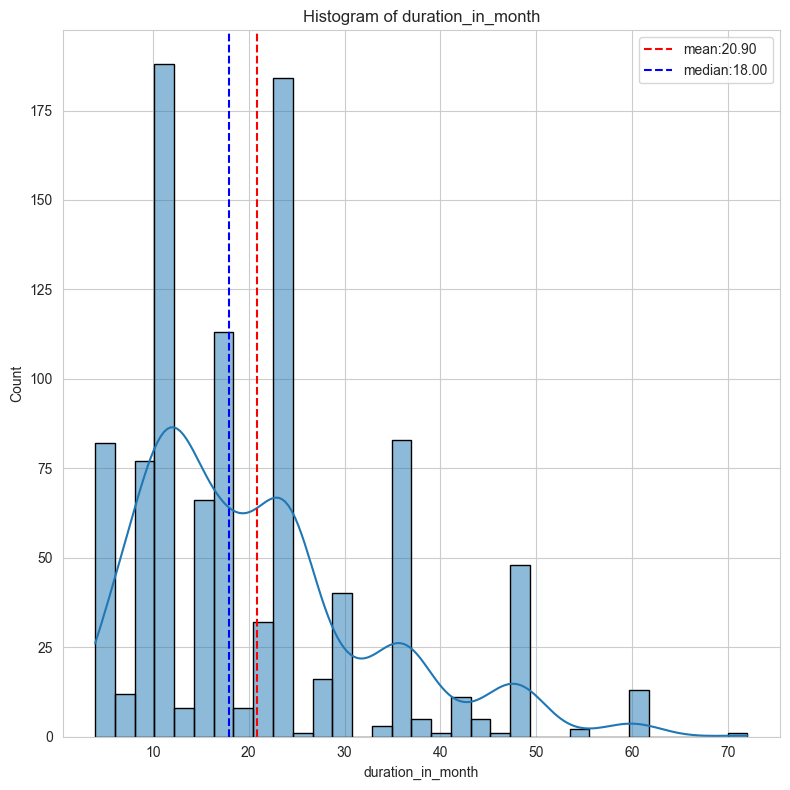

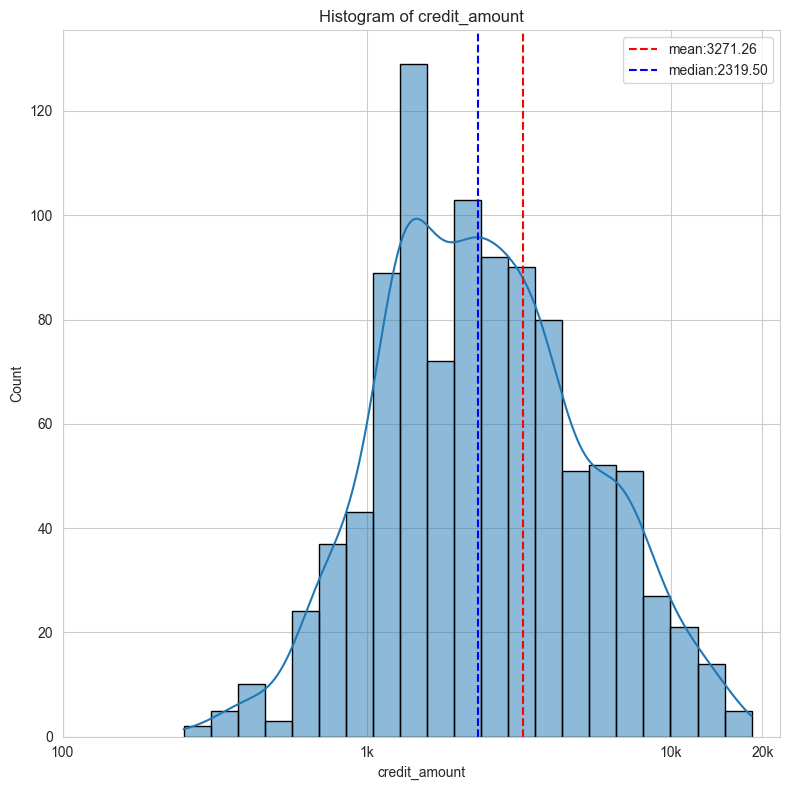

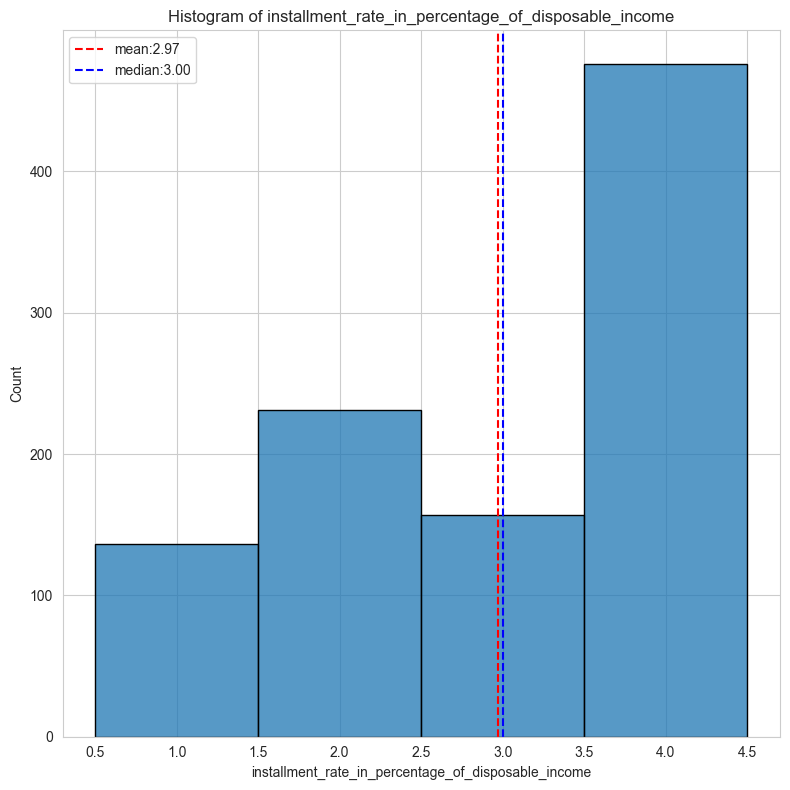

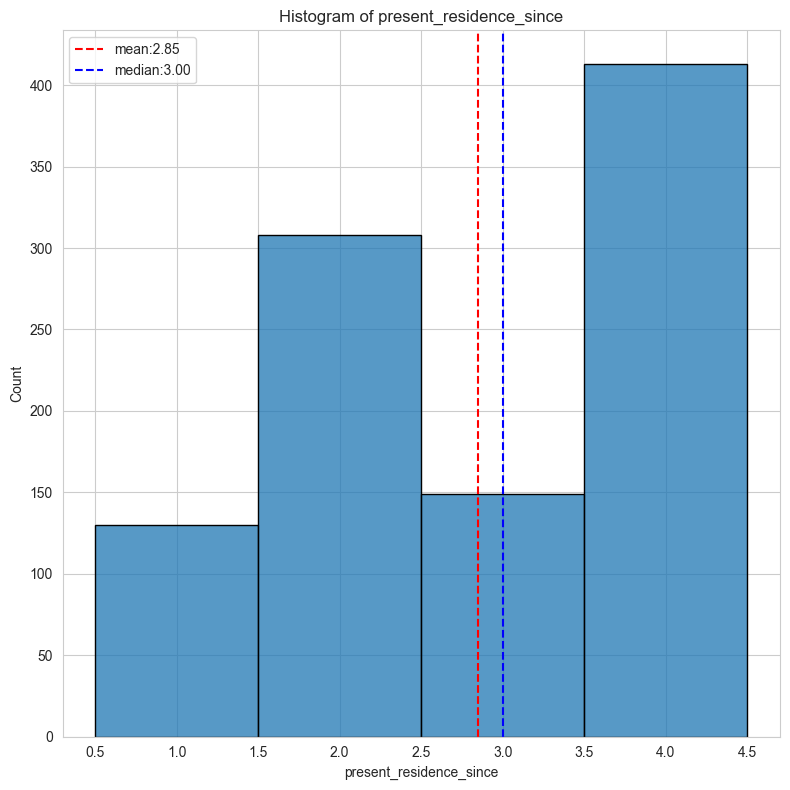

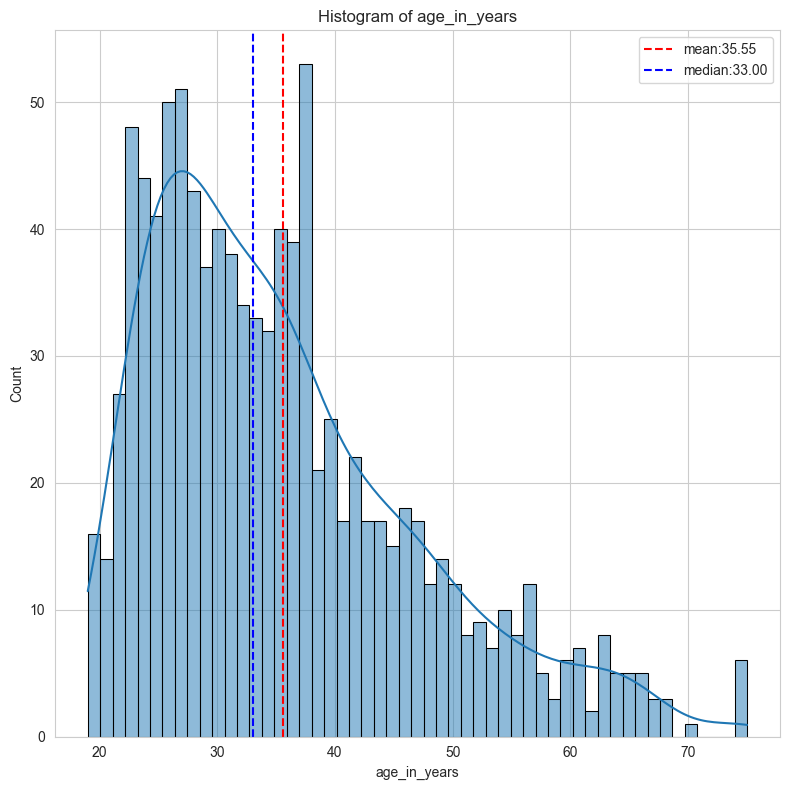

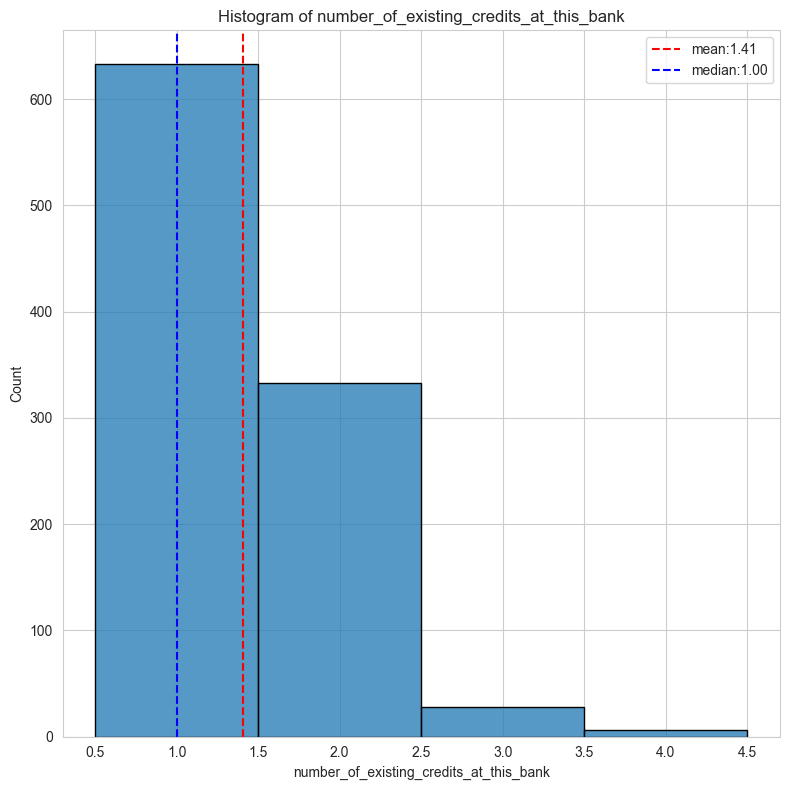

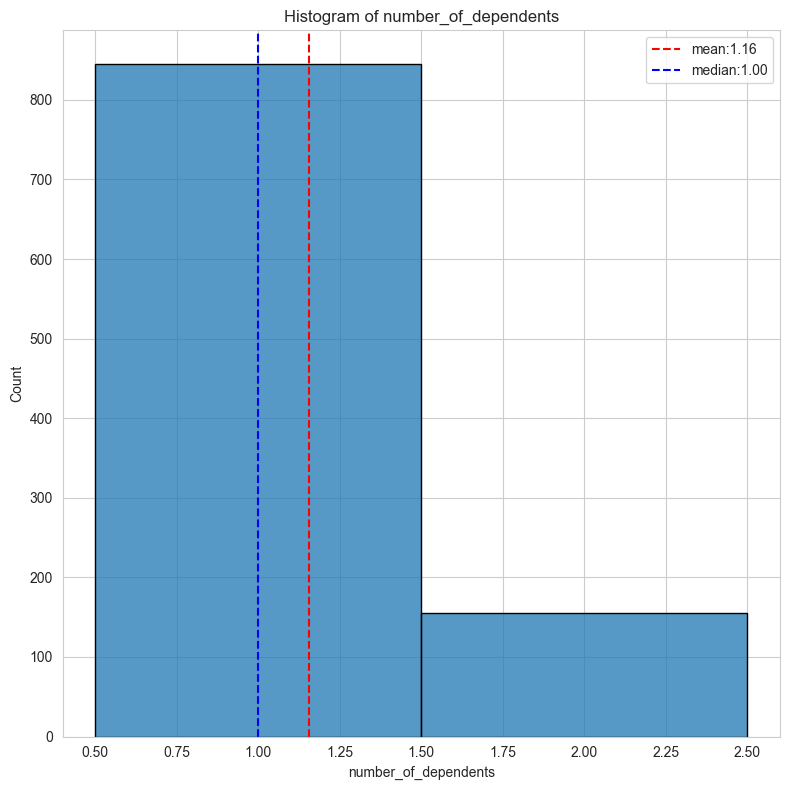

In [136]:
for col, vtype in variable_types.items():
    if vtype == 'numeric_discrete':
        data = df[col]
        if data.empty:
            continue

        plt.figure(figsize=[8,8])
        sns.histplot(data=data,
                     bins=len(data.unique()),
                     discrete=True,
                     edgecolor='black')

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()
    elif vtype == 'numeric_continuous':
        data = df[col]
        if data.empty:
            continue
        if data.max() < 10000:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         bins=len(data.unique()),
                         kde=True,
                         edgecolor='black')
        else:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         log_scale=(True, False),
                         kde=True,
                         edgecolor='black')
            plt.xticks([100, 1000, 10000, 20000], labels=['100', '1k', '10k',
                                                       '20k'])

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()


Plotting Spread of numeric data

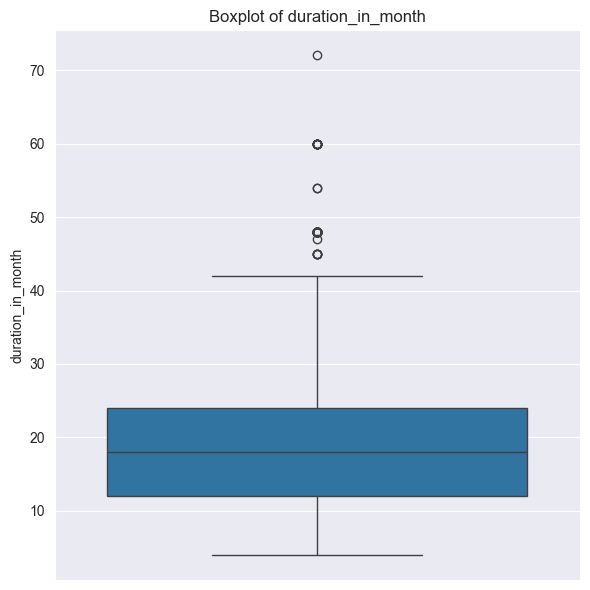

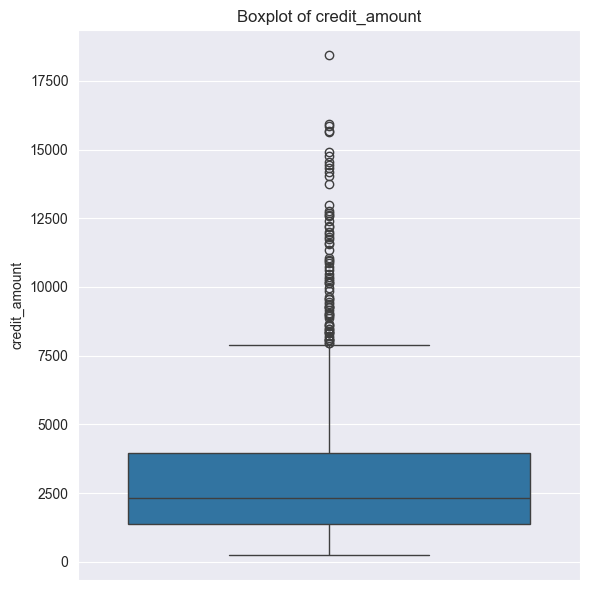

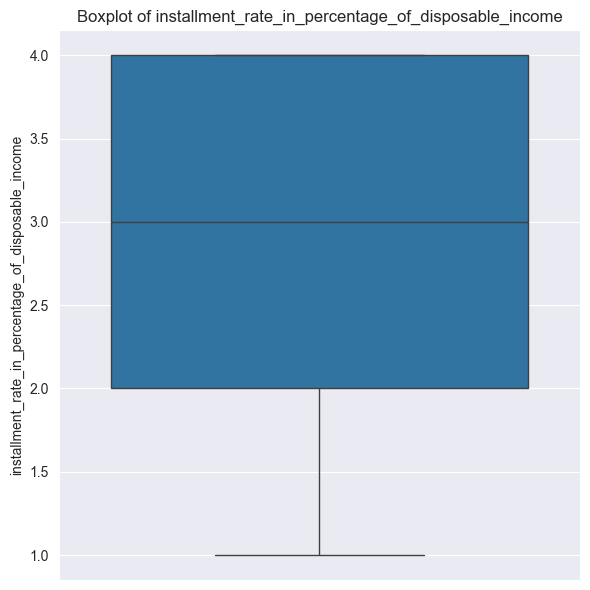

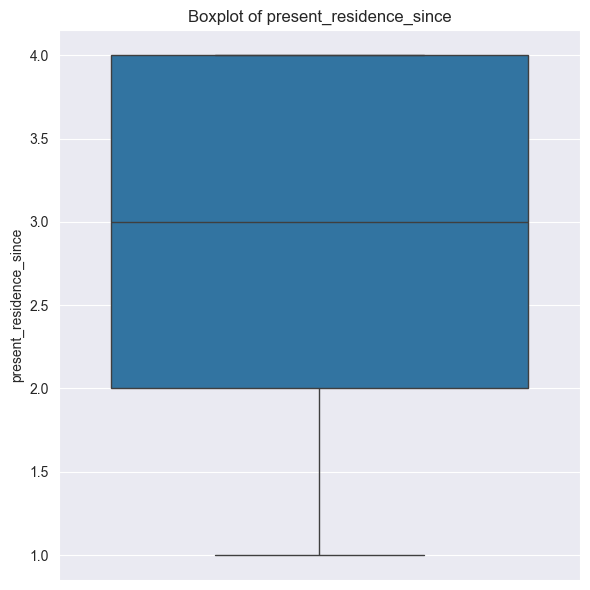

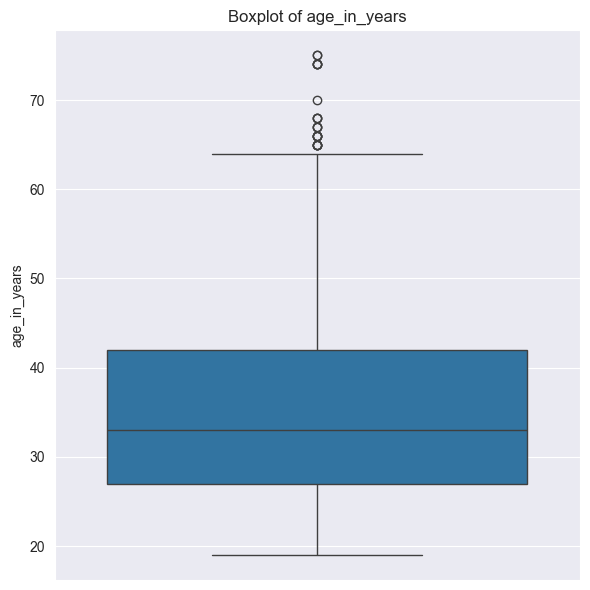

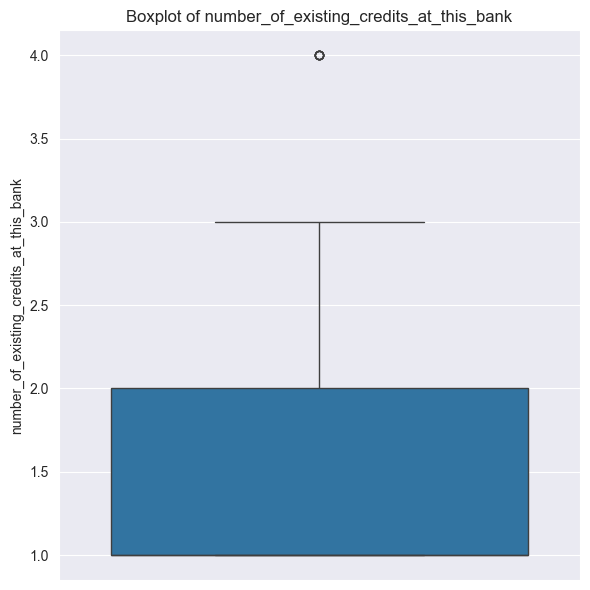

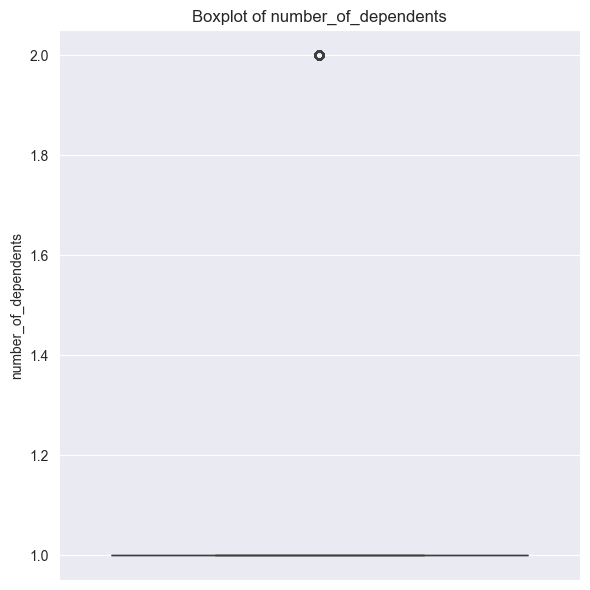

In [111]:
for col in numeric_columns:
    plt.figure(figsize=[6, 6])
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [138]:
df['number_of_dependents'].value_counts()

number_of_dependents
1    845
2    155
Name: count, dtype: int64

Plotting distribution of categorical data

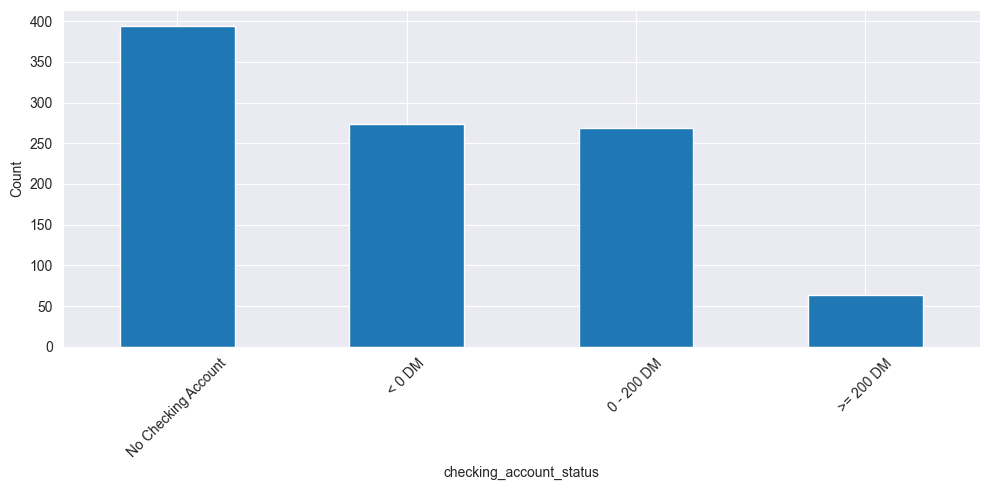

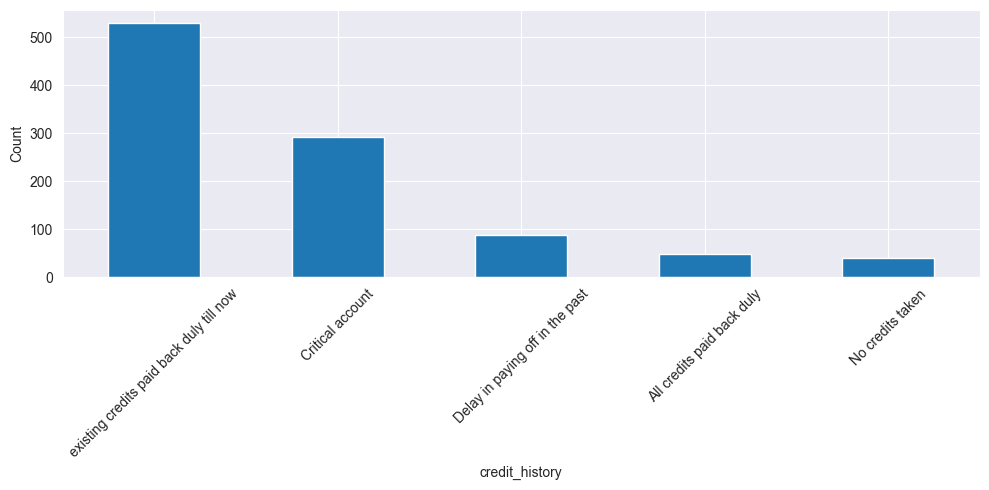

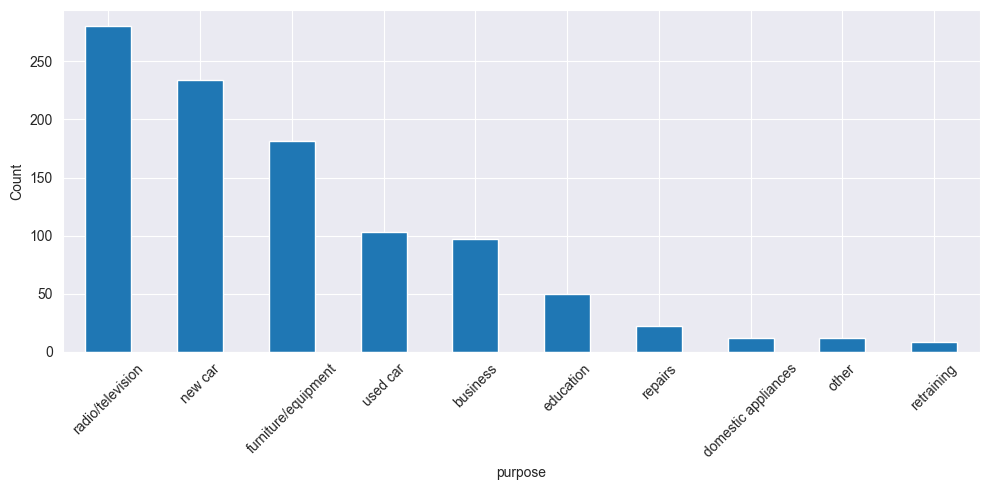

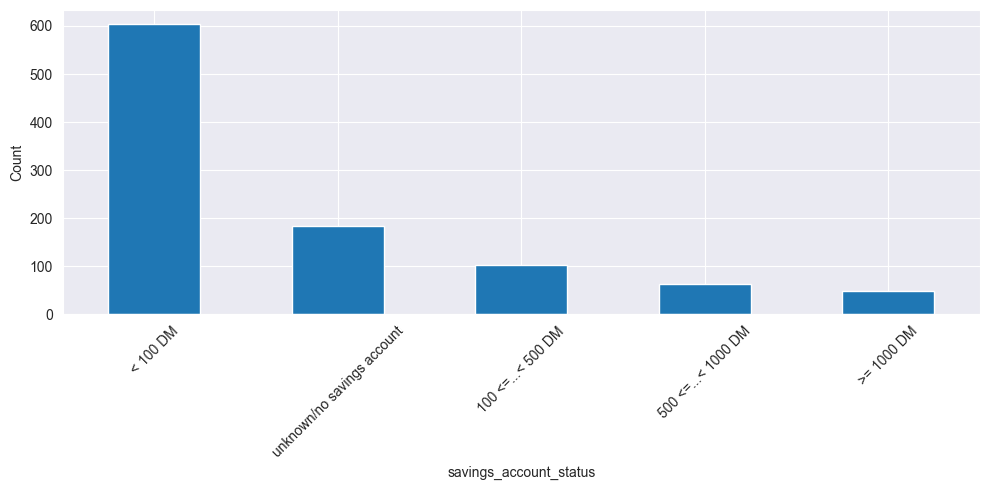

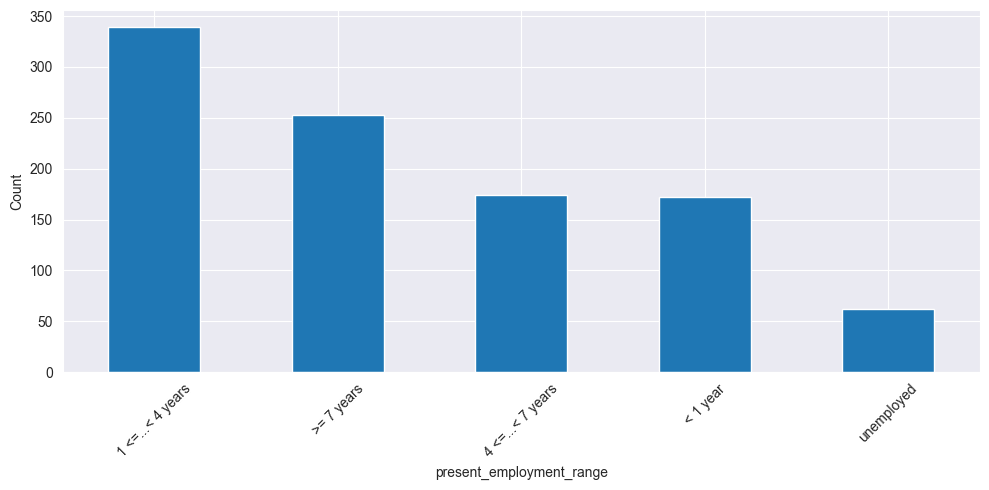

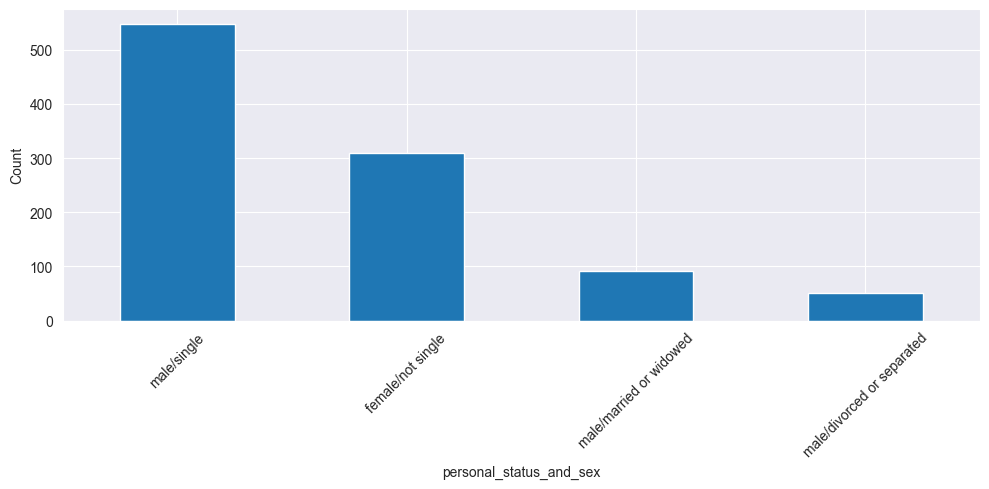

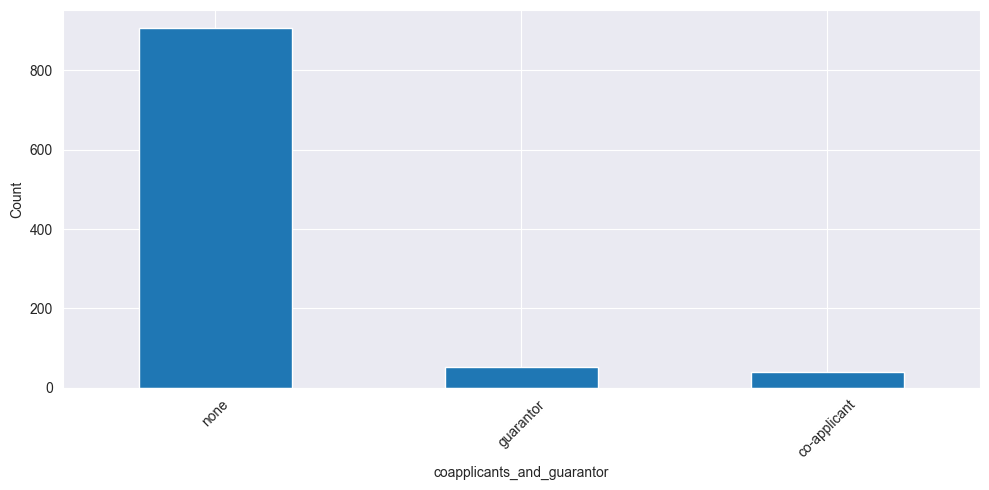

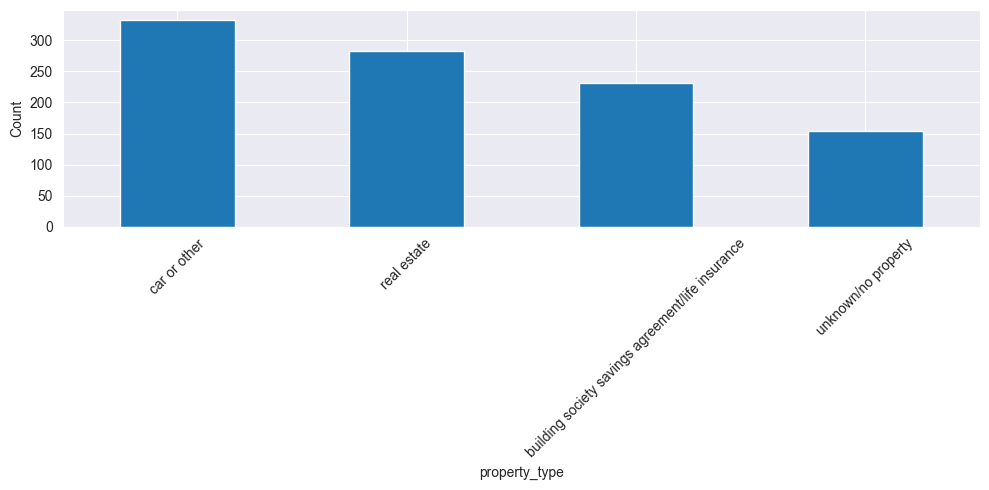

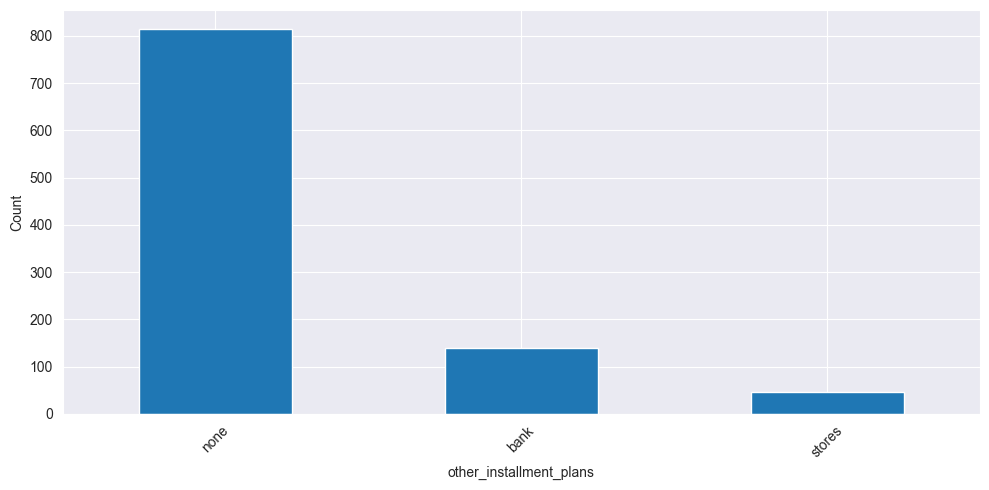

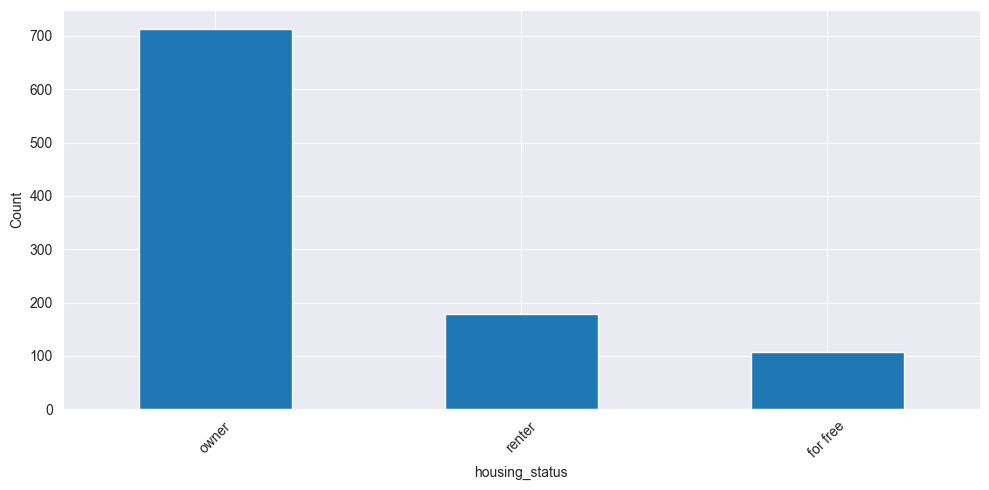

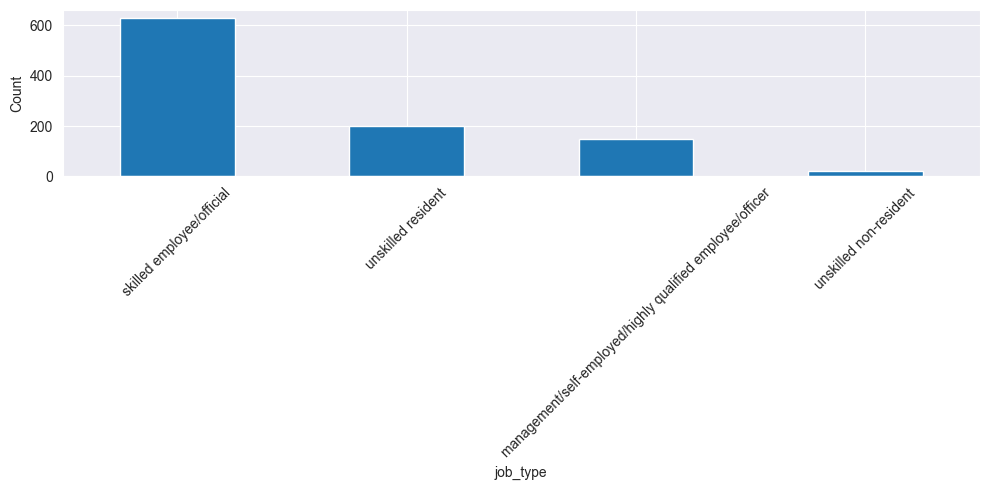

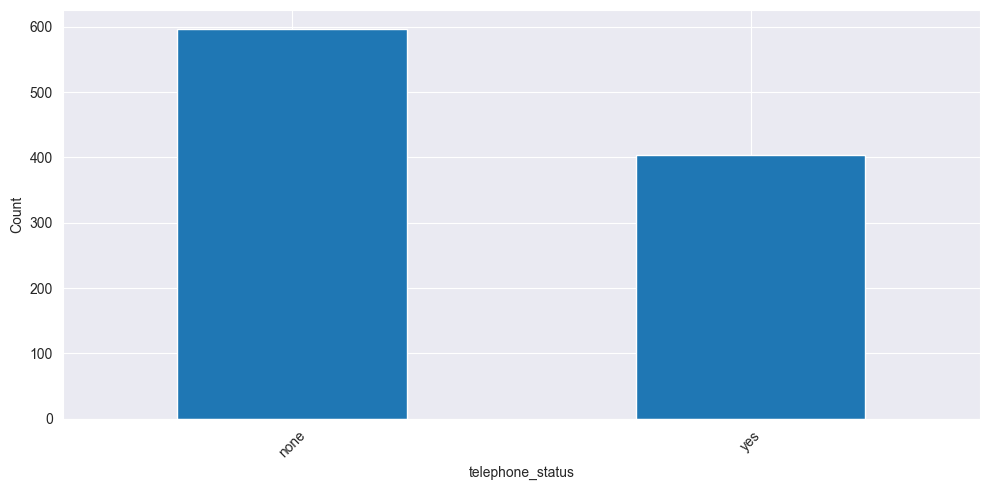

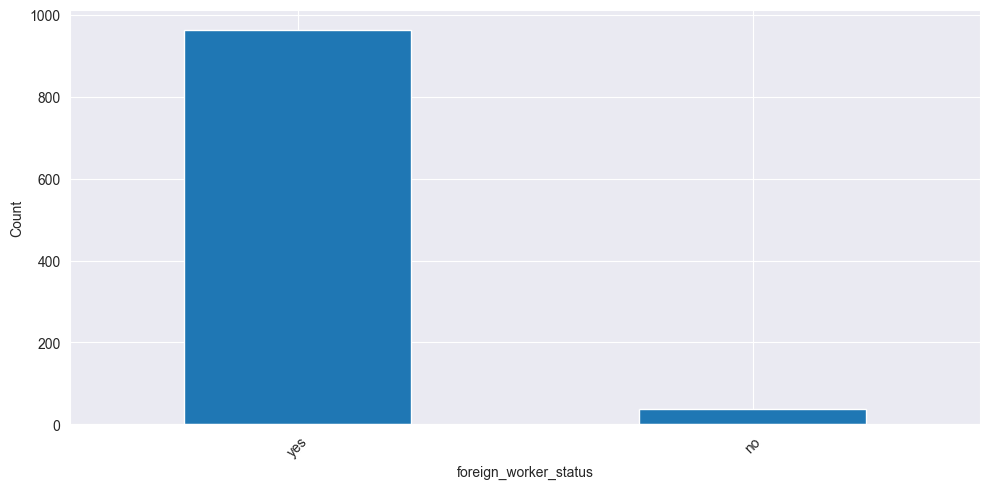

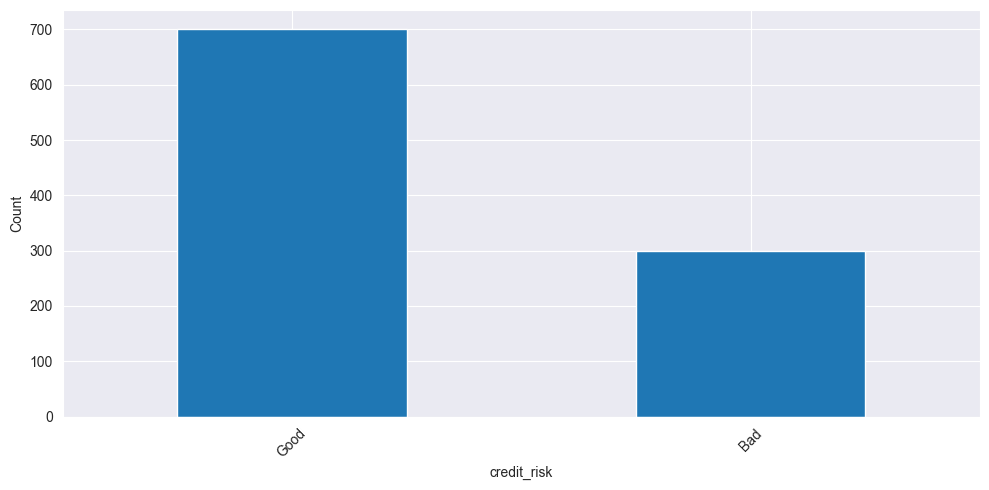

In [113]:
categorical_features = {}

for col in categorical_columns:
    categorical_features[str(col)] = df[str(col)].unique().tolist()

for col in categorical_columns:
    plt.figure(figsize=[10, 5])
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Bivariate Association